In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import plotly.express as px
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode, iplot, plot

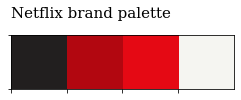

In [2]:
paleta=['#221f1f', '#b20710', '#e50914','#f5f5f1']
sns.palplot(paleta)
plt.title("Netflix brand palette ",loc='left',fontfamily='serif',fontsize=15,y=1.2);

In [3]:
df=pd.read_csv('data/netflix_titles.csv', encoding="latin-1")     ### cambio el 'encoding' ya que el dataset contiene caracteres no incluidos en 'utf-8'
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [4]:
df['director'].fillna('Sin Director', inplace=True)
df['cast'].fillna("Sin Cast", inplace=True)
df['country'].fillna("Sin Pais", inplace=True)


df.dropna(inplace=True)

#### Formateamos la fecha

In [5]:
df["date_added"] = pd.to_datetime(df['date_added'])

df['month_added']=df['date_added'].dt.month
df['month_name_added']=df['date_added'].dt.month_name()
df['year_added'] = df['date_added'].dt.year

#### Obtenemos las 5 categorias con mas subidas en todo el lapso temporal

In [6]:
data_sub = df.groupby('listed_in')['year_added'].value_counts().unstack().fillna(0)

data_sub['total']=data_sub.iloc[0::].sum(axis=1)
top_cinco=data_sub.sort_values(by='total').tail(5)
top_cinco

year_added,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,total
listed_in,,,,,,,,,,,,,,,
"Dramas, Independent Movies, International Movies",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,14.0,38.0,56.0,76.0,38.0,30.0,252.0
"Comedies, Dramas, International Movies",0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,36.0,65.0,55.0,72.0,43.0,274.0
Stand-Up Comedy,0.0,0.0,0.0,0.0,0.0,4.0,4.0,12.0,36.0,62.0,86.0,65.0,48.0,17.0,334.0
Documentaries,0.0,0.0,0.0,0.0,1.0,0.0,5.0,4.0,35.0,88.0,73.0,80.0,34.0,39.0,359.0
"Dramas, International Movies",0.0,1.0,0.0,1.0,0.0,0.0,0.0,2.0,15.0,46.0,99.0,62.0,76.0,60.0,362.0


In [29]:
colores=['#8B11FE','#ABFE11','#FE4E11','#FE1159','#2711FE']
data=[]
for i, mtv in enumerate(top_cinco.index):
    trace = go.Scatter(
                    x = data_sub.T[mtv].index,
                    y = data_sub.T[mtv],
                    mode = "lines",
                    marker = dict(color = colores),
                    name=mtv
                    )
    data.append(trace)


layout = dict(title = 'Top 5 Categorias mas subidas a Netflix',
              xaxis= dict(title= 'Año ',ticklen= 5,zeroline= False),
              yaxis= dict(title= 'Subidas ',ticklen= 5,zeroline= False),
             )

fig = dict(data = data, layout = layout)

iplot(fig)

### Otra hipotesis 

##### En netflix hay contenido para adultos sin criba para ninos

In [31]:
cal=pd.DataFrame(df.groupby('country')['rating'].value_counts().unstack().fillna(0)).T.max(axis=1)

In [79]:
mal=cal[cal.index.isin(['TV-MA','R','PG','TV-PG'])]
mal=pd.DataFrame(mal)
mal.rename(columns={0:'conteo'},inplace=True)
mal

,conteo
rating,
PG,164.0
R,440.0
TV-MA,927.0
TV-PG,249.0


#### Calificadores para 'mayores de edad' en peliculas
pg- parental guidance suggested
R- menores de 17 con tutor
Tv-PG parental guidance
Tv-MA mayores 17


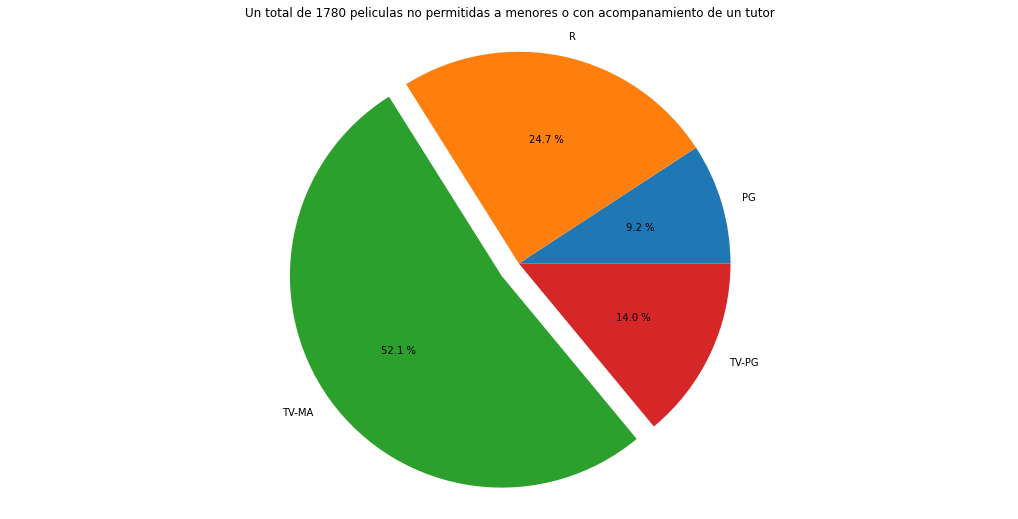

In [93]:

plt.subplots(figsize=(18,9))
desfase = (0., 0., 0.1, 0.)
plt.pie(mal.conteo, labels=mal.index,autopct="%0.1f %%",explode=desfase)
plt.title(label="Un total de %s peliculas no permitidas a menores o con acompanamiento de un tutor" % int(mal['conteo'].sum()),loc='center')
plt.axis('equal');
